In [9]:
%pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from mtcnn import MTCNN

{'box': [136, 156, 109, 143], 'confidence': 0.9958227872848511, 'keypoints': {'nose': [197, 242], 'mouth_right': [216, 272], 'right_eye': [221, 209], 'left_eye': [169, 208], 'mouth_left': [175, 272]}}


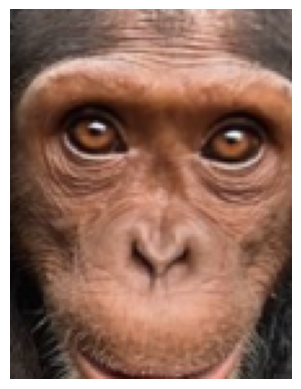

: 

In [28]:
import cv2
import matplotlib.pyplot as plt

# Créer une instance de MTCNN
detector = MTCNN(device="CPU:0")

# Charger l'image
image_path = "images/chimp_1.png"
image = cv2.imread(image_path)

# Convertir l'image en RGB (MTCNN s'attend à une image RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

result = detector.detect_faces(image_rgb)

if result:
    for i, face in enumerate(result):
        print(face)

        # Extraire les coordonnées du rectangle du visage
        x, y, width, height = face['box']

        # Découper l'image du visage
        face_image = image_rgb[y:y+height, x:x+width]

        # Sauvegarder chaque visage comme une nouvelle image
        face_image_bgr = cv2.cvtColor(face_image, cv2.COLOR_RGB2BGR)  # Convertir en BGR pour l'enregistrement avec OpenCV
        output_path = f"detected_face/face_{i+1}.png"
        cv2.imwrite(output_path, face_image_bgr)

        plt.imshow(face_image)
        plt.axis('off')
        plt.show()
else:
    print("Aucun visage détecté.")
